### Test algorithms on a larger subset of data
Another hypothesis why LinUCB might perform better than context free algorithms is that it does not see enough data to learn properly.

Here I am going to test algorithms on a larger subset of data, while also not filtering out articles.

In [1]:
import os
os.chdir('../..')
os.getcwd()

'/Users/sbokupripeku/git/work/examples/costly_nonstationary_bandits'

In [11]:
%load_ext autoreload
%autoreload 2

from datetime import timedelta
import time
import numpy as np
import pickle
import matplotlib.pyplot as plt


import algorithms
import costs
import evaluation
import dataset
from plotting.average_ctr import get_average_ctr_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This subset was parsed by a script ```costly_nonstationary_bandits/scripts/1_save_large_data_r6b.py```

In [3]:
%%time
import gc

with open("dataset/r6b/subsample/large/data_large.pickle", "rb") as f:
    gc.disable()
    data = pickle.load(f)
    gc.enable()

CPU times: user 18.3 s, sys: 6.52 s, total: 24.9 s
Wall time: 3min 18s


In [13]:
NUM_OF_TRIALS = None

In [14]:
p_random = algorithms.RandomPolicy()
ctr_random = evaluation.evaluate(p_random, data, stop_after=NUM_OF_TRIALS)

Random policy with ZeroCosts
Average reward: 0.0368
Execution time: 18.3m


In [15]:
egreedy = algorithms.EpsilonGreedy(epsilon=0.1, n_arms=data.n_arms)
ctr_egreedy = evaluation.evaluate(egreedy, data, stop_after=NUM_OF_TRIALS)

E-greedy(epsilon=0.1) with ZeroCosts
Average reward: 0.0743
Execution time: 19.1m


In [16]:
ucb_alg = algorithms.UCB1(
        n_arms=data.n_arms,
        alpha=0.01,
    )
ctr_ucb = evaluation.evaluate(ucb_alg, data, stop_after=NUM_OF_TRIALS)

UCB1 (α=0.01) with ZeroCosts
Average reward: 0.0875
Execution time: 20.1m


In [17]:
linucb = algorithms.LinUCB(
    context_dimension=len(data.events[0].user_features),
    n_arms=data.n_arms,
    alpha=0.03,
)
ctr_linucb = evaluation.evaluate(linucb, data, stop_after=NUM_OF_TRIALS)

LinUCB (alpha=0.03) with ZeroCosts
Average reward: 0.0731
Execution time: 110.1m


In [18]:
def plot_ctrs(ctr_dict, change_points=()):
    fig, ax = plt.subplots(1,1, figsize=(16, 8));
    
    N = 40
    
    max_vline=0
    
    for label, ctr in ctr_dict.items():
        ax.plot(ctr[N:], label=label)
        max_vline=max(max_vline, max(ctr[N:]))
    ax.set_xlabel('Trial')
    ax.set_ylabel('CTR')
    ax.set_title('Evaluation without costs')
    
    ax.vlines(change_points, 0, max_vline, label='change points', color='pink')

    plt.legend();
    plt.show();

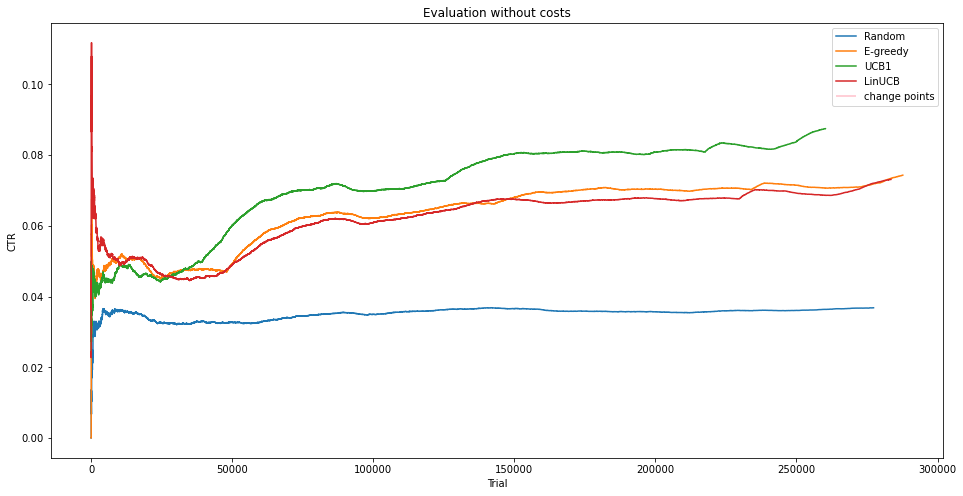

In [19]:
plot_ctrs({
    'Random': ctr_random,
    'E-greedy': ctr_egreedy,
    'UCB1': ctr_ucb,
    'LinUCB': ctr_linucb,
},
)
